In [27]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터 로드
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
# 1. 데이터 탐색 및 시각화
print(f"Train data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Unique labels: {np.unique(y_train)}")

Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


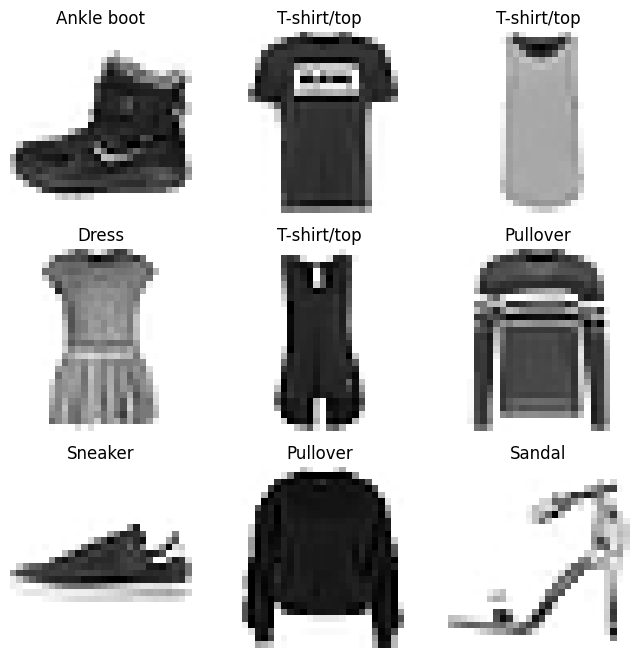

In [30]:
# 샘플 데이터 시각화
def visualize_data(images, labels, class_names, samples=9):
    plt.figure(figsize=(8, 8))
    for i in range(samples):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

visualize_data(x_train, y_train, class_names)

In [31]:
# 2. 데이터 정규화 (0~1 범위로 변환)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [32]:
# 3. 데이터 차원 확장 (CNN 입력 형태로 변환)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [33]:
# 4. 레이블 원-핫 인코딩 (Optional: Categorical Crossentropy 사용 시)
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [34]:
# 최종 확인
print(f"Processed train data shape: {x_train.shape}")
print(f"Processed test data shape: {x_test.shape}")

Processed train data shape: (60000, 28, 28, 1)
Processed test data shape: (10000, 28, 28, 1)


In [35]:
# 5. CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 클래스가 10개이므로 출력층 크기는 10
])


c:\Users\amy35\anaconda3\envs\lecture\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# 6. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [37]:
# 7. 모델 학습
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6826 - loss: 0.8716 - val_accuracy: 0.8611 - val_loss: 0.3928
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8344 - loss: 0.4606 - val_accuracy: 0.8800 - val_loss: 0.3435
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8615 - loss: 0.3859 - val_accuracy: 0.8808 - val_loss: 0.3194
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8700 - loss: 0.3578 - val_accuracy: 0.8934 - val_loss: 0.2930
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8782 - loss: 0.3370 - val_accuracy: 0.8934 - val_loss: 0.2874
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8834 - loss: 0.3251 - val_accuracy: 0.8948 - val_loss: 0.2767
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8887 - loss: 0.3083 - val_accuracy: 0.9016 - val_loss: 0.2647
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8902 - loss: 0

In [38]:
# 8. 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9052 - loss: 0.2636
Test accuracy: 0.91


In [ ]:
# 9. 예측 및 시각화
predictions = model.predict(x_test)

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = predictions_array.argmax()
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({100 * max(predictions_array):.2f}%)\n[True: {class_names[true_label]}]",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10), class_names, rotation=45)
    plt.yticks([])
    bar = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = predictions_array.argmax()
    bar[predicted_label].set_color('red')
    bar[true_label].set_color('blue')



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


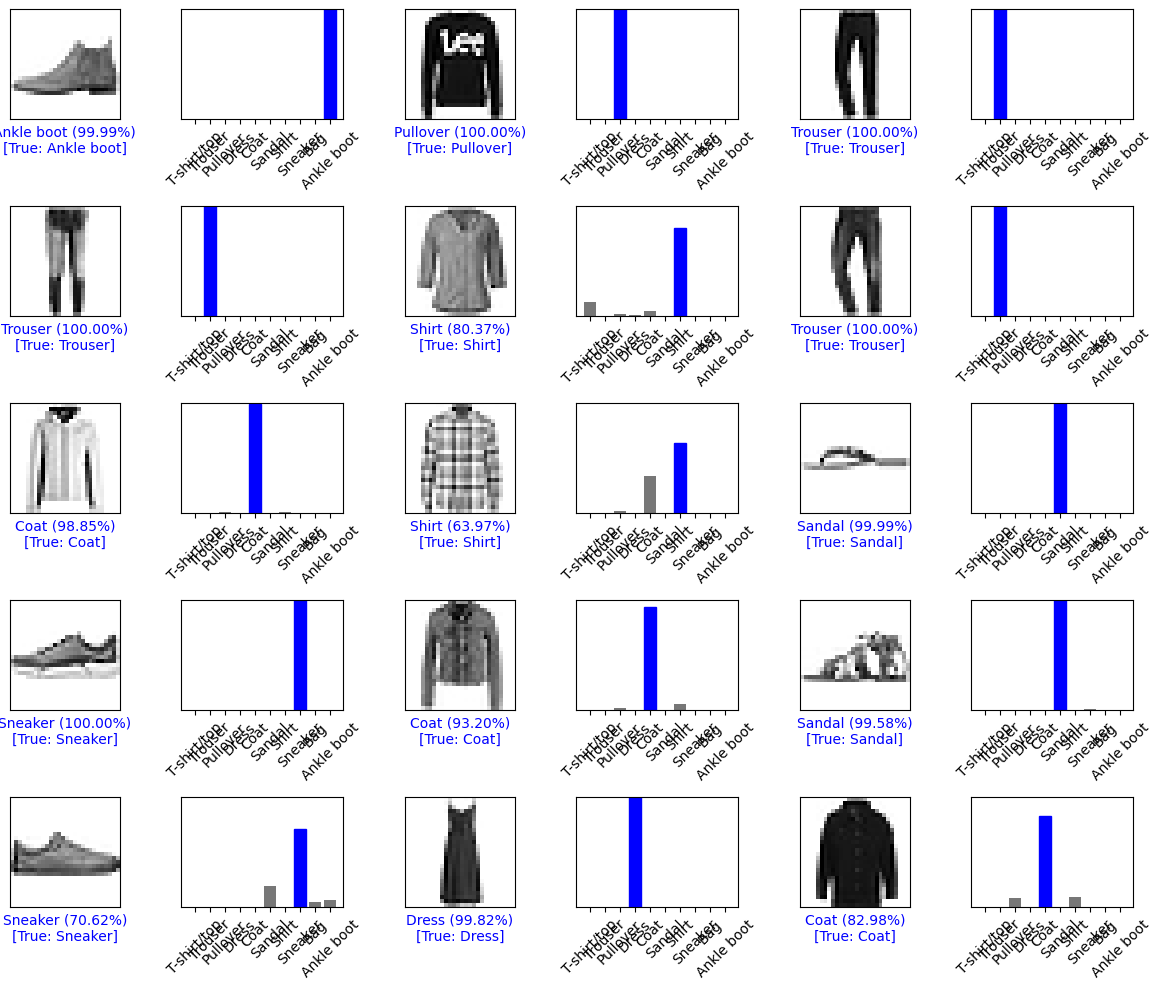

In [40]:
# 이미지와 예측 결과 시각화
num_rows, num_cols = 5, 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, y_test, x_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, y_test)
plt.tight_layout()
plt.show()
